In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
train_datagen_nor = ImageDataGenerator(
        rescale=1./255)

test_datagen_nor = ImageDataGenerator(validation_split=0.5,
       
        rescale=1./255)

train_data = train_datagen_nor.flow_from_directory(r'/content/drive/MyDrive/corrupted-2/train',target_size=(512,512), 
                                                       batch_size=32, class_mode='categorical')
valid_data = test_datagen_nor.flow_from_directory(r'/content/drive/MyDrive/corrupted-2/test',target_size=(512,512), 
                                                       subset='validation',batch_size=32, class_mode='categorical')
test_data = test_datagen_nor.flow_from_directory(r'/content/drive/MyDrive/corrupted-2/test',target_size=(512,512), 
                                                       subset='training',batch_size=32, class_mode='categorical')

In [5]:
from keras.regularizers import l2
from keras.layers import BatchNormalization
from keras.layers import GaussianNoise
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = (5,5), kernel_regularizer=l2(0.01), padding = 'Same', activation ='relu', input_shape = (512,512,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters = 48, kernel_size = (5,5), kernel_regularizer=l2(0.01), padding = 'Same', activation ='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides = 2))
model.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3),kernel_regularizer=l2(0.01), padding = 'Same', activation ='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides= 2))
model.add(tf.keras.layers.Conv2D(filters = 192, kernel_size = (3,3), kernel_regularizer=l2(0.01), padding = 'Same', activation ='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides= 2))
model.add(tf.keras.layers.Conv2D(filters = 192, kernel_size = (3,3), kernel_regularizer=l2(0.01), padding = 'Same', activation ='relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides= 2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation = "relu", kernel_regularizer=l2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128, activation = "relu", kernel_regularizer=l2(0.01)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(50, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 512, 512, 8)       608       
_________________________________________________________________
batch_normalization (BatchNo (None, 512, 512, 8)       32        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 512, 512, 48)      9648      
_________________________________________________________________
batch_normalization_1 (Batch (None, 512, 512, 48)      192       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 256, 256, 48)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 128)     55424     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256, 256, 128)     5

In [ ]:
import tensorflow.compat.v1 as tfs
gpu_options = tfs.GPUOptions(allow_growth = True)
session = tfs.InteractiveSession(config = tfs.ConfigProto(gpu_options = gpu_options))

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import CSVLogger

csv = CSVLogger("/content/drive/MyDrive/corrupted-2/corrupted-cnn-50-model_history_log(normal).csv", append=True)
es1= tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3, restore_best_weights=True)
mc = ModelCheckpoint('/content/drive/MyDrive/corrupted-2/corrupted-cnn-50-model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [6]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.0001, decay = 0.9)
model.compile(optimizer = adam, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
history = model.fit(train_data,epochs=300,shuffle=True,validation_data=valid_data,callbacks=[csv,es1,mc])

Epoch 1/300
126/126 [==============================] - 1433s 11s/step - loss: 11.7700 - accuracy: 0.1180 - val_loss: 12.5780 - val_accuracy: 0.0400

Epoch 00001: val_accuracy improved from -inf to 0.04000, saving model to /content/drive/MyDrive/corrupted-2/corrupted-cnn-50-model.h5
Epoch 2/300
126/126 [==============================] - 107s 849ms/step - loss: 11.0144 - accuracy: 0.2545 - val_loss: 12.2881 - val_accuracy: 0.0620

Epoch 00002: val_accuracy improved from 0.04000 to 0.06200, saving model to /content/drive/MyDrive/corrupted-2/corrupted-cnn-50-model.h5
Epoch 3/300
126/126 [==============================] - 107s 844ms/step - loss: 10.8440 - accuracy: 0.3012 - val_loss: 11.2144 - val_accuracy: 0.2040

Epoch 00003: val_accuracy improved from 0.06200 to 0.20400, saving model to /content/drive/MyDrive/corrupted-2/corrupted-cnn-50-model.h5
Epoch 4/300
126/126 [==============================] - 107s 845ms/step - loss: 10.7103 - accuracy: 0.3410 - val_loss: 10.5222 - val_accuracy: 0

In [ ]:
model.save_weights('/content/drive/MyDrive/corrupted-2/corrupted(25)-cnn_dataset-50_weights.h5')

In [7]:
model.load_weights(r'D:\Uni-passau\thesis-results\50-dataset\corrupted-25-cnn\corrupted(25)-cnn_dataset-50_weights.h5')

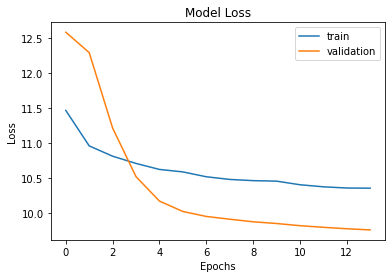

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.savefig('/content/drive/MyDrive/corrupted-2/corrupted(25)-cnn_dataset-50-loss.png')
plt.show()

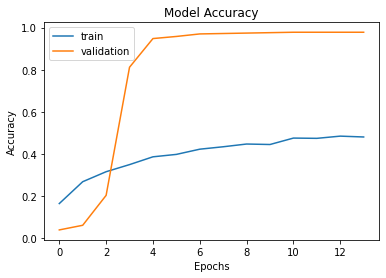

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.savefig('/content/drive/MyDrive/corrupted-2/corrupted(25)-cnn_dataset-50-accuracy.png')
plt.show()

In [8]:
test_datagen_nor = ImageDataGenerator(rescale=1./255)

test_datagen_aug =  ImageDataGenerator(width_shift_range=0.15,validation_split=0.5,
        height_shift_range=0.15,
        horizontal_flip=True,rotation_range=10,
        rescale=1./255)

In [ ]:
## train and valid

In [ ]:
train_acc=model.evaluate(train_data)
val_acc = model.evaluate(valid_data)
print("Train_Accuracy: %.2f%%" % (train_acc[1]*100))
print("valid_Accuracy: %.2f%%" % (val_acc[1]*100))

16/16 [==============================] - 7s 427ms/step - loss: 9.8245 - accuracy: 0.9780
Train_Accuracy: 97.78%
valid_Accuracy: 97.80%


In [ ]:
test_acc=model.evaluate(test_data)
print("Train_Accuracy: %.2f%%" % (train_acc[1]*100))

18/18 [==============================] - 203s 12s/step - loss: 9.7659 - accuracy: 0.9818
Train_Accuracy: 97.78%


In [ ]:
## corrupted-25 (test data)

In [ ]:
test_corrupted= test_datagen_nor.flow_from_directory( r'/content/drive/MyDrive/corrupted-2/test',
        batch_size=32,target_size=(512,512),
        class_mode='categorical')
test_acc = model.evaluate(test_corrupted)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1050 images belonging to 50 classes.
33/33 [==============================] - 20s 596ms/step - loss: 9.7938 - accuracy: 0.9800
Test_Accuracy: 98.00%


In [ ]:
## corrupted-25 (test data) augumentation

In [17]:
test_corrupted_aug= test_datagen_aug.flow_from_directory( r'/content/drive/MyDrive/corrupted-2/test',
                                                         batch_size=32,target_size=(512,512),class_mode='categorical')
test_acc = model.evaluate(test_corrupted_aug)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1050 images belonging to 50 classes.
33/33 [==============================] - 395s 12s/step - loss: 13.9836 - accuracy: 0.0171
Test_Accuracy: 1.71%


In [ ]:
## normal dataset

In [ ]:
test_genrator_nor = test_datagen_nor.flow_from_directory( r'/content/drive/MyDrive/dataset-50/nor-dataset-50/test',
        target_size=(512,512),
        batch_size=32,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_nor)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
41/41 [==============================] - 400s 10s/step - loss: 21.5748 - accuracy: 0.0523
Test_Accuracy: 5.23%


In [ ]:
## gausssin noise

In [6]:
test_genrator_nor = test_datagen_nor.flow_from_directory( r'D:\Uni-passau\thesis-smalldataset\gaussian-50\test',
        target_size=(512,512),
        batch_size=32,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_nor)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
41/41 [==============================] - 269s 7s/step - loss: 20.0466 - accuracy: 0.0477
Test_Accuracy: 4.77%


In [ ]:
## normal data with augumentation

In [ ]:
test_genrator_aug = test_datagen_aug.flow_from_directory( r'/content/drive/MyDrive/dataset-50/nor-dataset-50/test',
        target_size=(512,512),
        batch_size=32,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_aug)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
41/41 [==============================] - 70s 2s/step - loss: 48.6333 - accuracy: 0.0177
Test_Accuracy: 1.77%


In [ ]:
## corrupted-20

In [6]:
test_corrupted1= test_datagen_nor.flow_from_directory( r'/content/drive/MyDrive/dataset-50/corrupted-1/test',
        batch_size=32,target_size=(512,512),
        class_mode='categorical')
test_acc = model.evaluate(test_corrupted1)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
41/41 [==============================] - 444s 11s/step - loss: 9.9976 - accuracy: 0.9369
Test_Accuracy: 93.69%


In [ ]:
## corrupted-20 augumenattopn

In [10]:
test_corrupted_aug= test_datagen_aug.flow_from_directory( r'/content/drive/MyDrive/dataset-50/corrupted-1/test',
        batch_size=32,target_size=(512,512),
        class_mode='categorical')
test_acc = model.evaluate(test_corrupted_aug)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
41/41 [==============================] - 70s 2s/step - loss: 18.4735 - accuracy: 0.0162
Test_Accuracy: 1.62%


In [ ]:
## corrupted-50

In [12]:
test_corrupted2= test_datagen_nor.flow_from_directory( r'/content/drive/MyDrive/dataset-50/corrupted-2/test',
        batch_size=32,target_size=(512,512),
        class_mode='categorical')
test_acc = model.evaluate(test_corrupted2)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
41/41 [==============================] - 15s 364ms/step - loss: 10.8531 - accuracy: 0.3331
Test_Accuracy: 33.31%


In [ ]:
## corrupted-50 augumenattion

In [11]:
test_corrupted2_aug= test_datagen_aug.flow_from_directory( r'/content/drive/MyDrive/dataset-50/corrupted-2/test',
        batch_size=32,target_size=(512,512),
        class_mode='categorical')
test_acc = model.evaluate(test_corrupted2_aug)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
41/41 [==============================] - 484s 12s/step - loss: 12.6475 - accuracy: 0.0169
Test_Accuracy: 1.69%


In [ ]:
## corrupted-10

In [9]:
test_genrator_cor10 = test_datagen_nor.flow_from_directory( r'D:\Uni-passau\thesis-smalldataset\corrupted-10',
       batch_size=80,target_size=(512,512),
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_cor10)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
17/17 [==============================] - 244s 14s/step - loss: 11.5885 - accuracy: 0.3969
Test_Accuracy: 39.69%


In [ ]:
## corrupted-30

In [ ]:
test_genrator_cor30 = test_datagen_nor.flow_from_directory( r'D:\Uni-passau\thesis-smalldataset\corrupted-30',
        batch_size=80,target_size=(512,512),
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_cor30)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
 5/17 [=======>......................] - ETA: 2:44 - loss: 10.1213 - accuracy: 0.9100

In [ ]:
## corrupted-40

In [12]:
test_genrator_cor40 = test_datagen_nor.flow_from_directory( r'D:\Uni-passau\thesis-smalldataset\corrupted-40',
        batch_size=80,target_size=(512,512),
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_cor40)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
17/17 [==============================] - 252s 15s/step - loss: 10.4609 - accuracy: 0.6446
Test_Accuracy: 64.46%


In [ ]:
## corrupted-50

In [13]:
test_genrator_cor50 = test_datagen_nor.flow_from_directory( r'D:\Uni-passau\thesis-smalldataset\corrupted-50\test',
        batch_size=80,target_size=(512,512),
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_cor50)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
17/17 [==============================] - 250s 15s/step - loss: 10.8531 - accuracy: 0.3331
Test_Accuracy: 33.31%


In [ ]:
## corrupted-60

In [15]:
test_genrator_cor60 = test_datagen_nor.flow_from_directory( r'D:\Uni-passau\thesis-smalldataset\corrupted-60',
        batch_size=80,target_size=(512,512),
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_cor60)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
17/17 [==============================] - 256s 15s/step - loss: 29.2692 - accuracy: 0.0585
Test_Accuracy: 5.85%
